In [1]:
import numpy as np
import matplotlib.pyplot as plt

When?
$\tau = -\frac{\ln(u_{[0,1]})}{\sum_\nu w_{\nu\mu}}$

Where?
$\frac{\sum_i^\nu w_{i\mu}}{\sum_\nu w_{\nu\mu}}>u_{[0,1]}$

$w_{ii} = 0$

In [6]:
def MarkovJumps(TrMtx, t, tf, p):
  T = [t]
  P = [p]
  n = np.size(TrMtx, axis=0)
  while t < tf:
    r = np.random.uniform(size=2)
    wT = -TrMtx[p][p]
    t -= np.log(r[0])/wT
    psum = 0
    for i in range(n):
      if i != p:
        if (psum + TrMtx[i][p])/wT > r[1]:
          p = i
          break
        else:
          psum += TrMtx[i][p]
    T.append(t)
    P.append(p)
  return T[:-1], P[:-1]

A well-established model for the equilibrium fluctuations of a single ion 
channel is a continuous-time Markov process that can only take two values 
$X_t = \{0,1\}$ for $t > 0$, where $X_t = 0$ if the channel is closed at 
time $t$ and $X_t = 1$ if the channel is open at time $t$.
  1. Let us call $\omega_+$ the rate at which a close channel opens and 
  $\omega_-$ the rate at which an open channel closes. Write the Master equation
  for the probabilities $P_0(t)$ and $P_1(t)$  for a channel to be close and
  open at time $t > 0$  for a generic initial condition and for any values of 
  the opening and closing rates. Solve the Master equation, and obtain the 
  stationary probability to be in the closed and open state, and the stationary 
  current.
  2. Let $\Delta G > 0$ be the free energy change associated with the opening
  of a single channel. Detailed balance tells us that if the channels are in
  thermal equilibrium
  \begin{equation}
      \frac{\omega_+}{\omega_-}=\text{exp}(- \Delta G/k_B T)
  \end{equation}
  Discuss the stationary probability if Eq.\eqref{DB} holds, what does it
  correspond to? If one has 100 independent ion channels in thermal equilibrium
  at temperature $T = 300K$,  plot the average number of open channels as a
  function of $\Delta G$ ranging from $0.1k_B T$ to $100k_B T$. How does this 
  plot change when we increase the temperature by $10K$? And when we decrease it
  by $10K$?  Find in the literature the value of $\Delta G$ for a Ca $^{2+}$ ion
  channel.

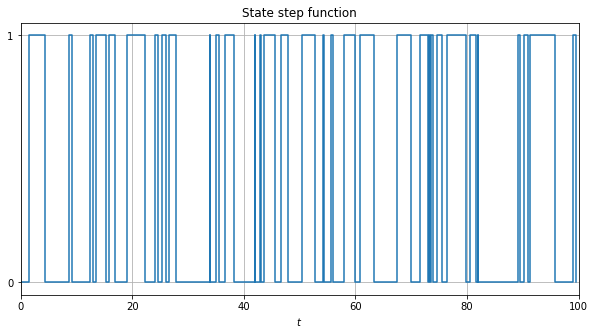

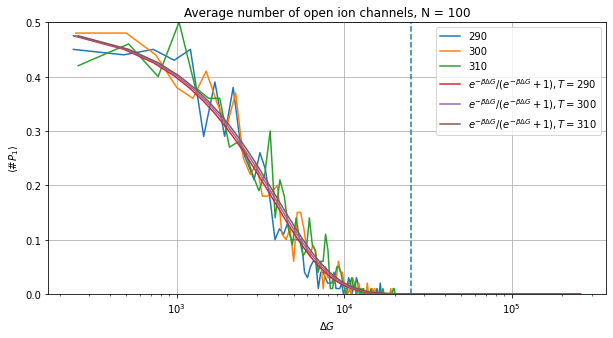

In [8]:
# Problem 2
N = 1
ti = 0
tf = 100
w = [0.5, 0.5] # w_+, w_-
L = np.array(((-w[0], w[1]),
              (w[0], -w[1])))
plt.figure(0, figsize=(10, 5))
plt.xlim([ti, tf])
plt.xlabel("$t$")
plt.title("State step function")
plt.yticks([0, 1])
plt.grid()
T, P = MarkovJumps(L, ti, tf, 0)
plt.step(T, P, where="post")

N = 100
kB = 8.314
plt.figure(1, figsize=(10, 5))
plt.xlabel(r"$\Delta G$")
plt.ylabel(r"$\langle$#$P_1\rangle$")
plt.ylim([0, 0.5])
plt.xscale("log")
for T in [290, 300, 310]:
  gi = 0.1*kB*T
  gf = 100*kB*T
  G = np.linspace(gi, gf, 1000)
  O = np.zeros(1000)
  for j, dG in enumerate(G):
    open = 0
    w = [np.exp(-dG/(kB*T)), 1] # w_+, w_-
    L = np.array(((-w[0], w[1]),
                  (w[0], -w[1])))
    for i in range(N):
      open += MarkovJumps(L, ti, tf, i % 2)[1][-1]
    O[j] = open/N
  plt.plot(G, O, label=f"{T}")

for T in [290, 300, 310]:
  gi = 0.1*kB*T
  gf = 100*kB*T
  G = np.linspace(gi, gf, 1000)
  plt.plot(G, np.exp(-G/(kB*T))/(1 + np.exp(-G/(kB*T))),
        label=r"$e^{-\beta \Delta G}/(e^{-\beta \Delta G} + 1), T = $" + f"{T}")
T = 300
plt.vlines(10*kB*T, 0, 0.5, linestyles="dashed")
plt.legend()
plt.grid()
plt.title(f"Average number of open ion channels, N = {N}")
plt.savefig(f"IonChannel{N}.pdf", format="pdf")

Experimentalists sketched a continuous-time Markov-jump model of an enzymatic
reaction (see Fig. 1). Here, $r$ and $\gamma$ are two rate parameters,
$\beta = 1/k_B T$ and $E$ is the energy difference between two adjacent energy
levels, and $T$ is the temperature of the environment.
  1. Write the Master equation of the model in matrix form.
  2. Calculate the probability to be in any of the state in the long time limit,
  i.e. its stationary value. Compare this result with the associated Boltzmann
  distribution.
  3. What is the stationary current between each of the states? Sketch the
  direction of the current between all the states. For which value of $E$ is the
  current equal to zero and why?
  4. Suppose now that the enzyme consumes one ATP molecule every time that an
  ``upwards" transition with rate $r$ takes place. Make 5 stochastic simulations
  of the total number of ATP molecules consumed as a function of time for the 
  parameter values $\gamma = r = 0.5\text{s}^{-1}$ and $E = 2k_BT$. Compute 
  from 1000 simulations what is the average number of ATP molecules consumed in 
  5 min, and relate this value to the net stationary current of the model.

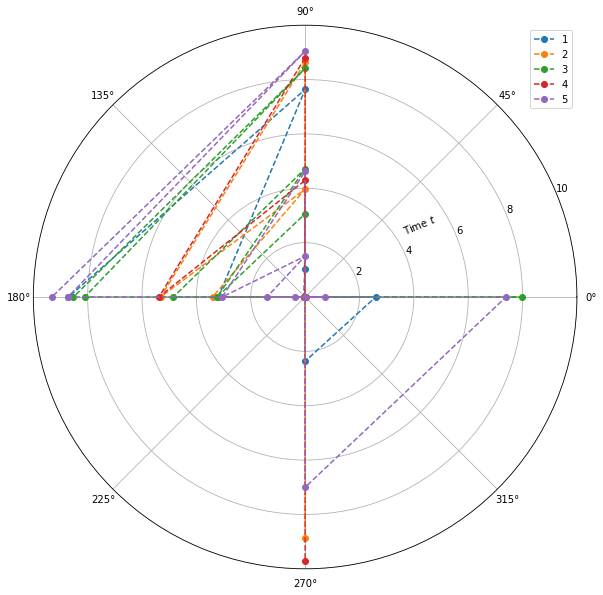

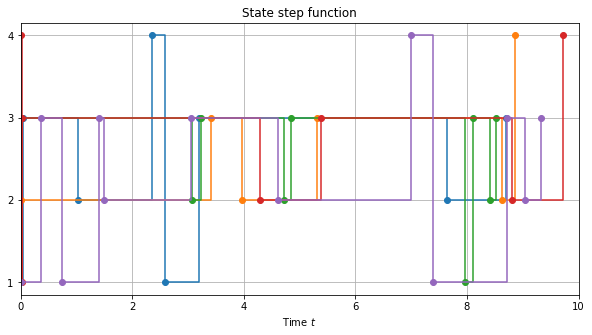

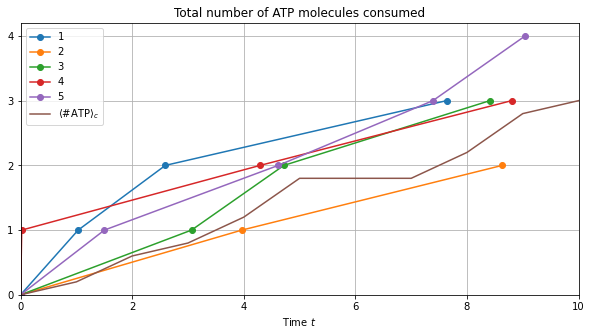

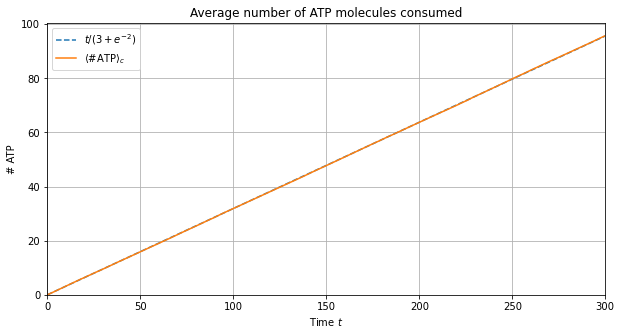

In [17]:
# Problem 3
g = 0.5
r = 0.5
ti = 0
tf = 10
dt = 1  # Arbitrary
bE = 2

L = np.array(((-g - r, 0, g*np.exp(-bE), r),
              (0, -g - r, r, g*np.exp(-bE)),
              (g, r, -g*np.exp(-bE) - r, 0),
              (r, g, 0, -g*np.exp(-bE) - r,)))

plt.figure(0, figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.text(np.radians(ax.get_rlabel_position() + 10), tf/2., "Time $t$",
        rotation=ax.get_rlabel_position(), ha='center', va='center')
ax.set_rlim([0, tf])
plt.figure(1, figsize=(10, 5))
plt.title("State step function")
plt.xlabel("Time $t$")

N = 5
plt.figure(2, figsize=(10, 5))
plt.title("Total number of ATP molecules consumed")
plt.xlabel("Time $t$")
ATPs = []
ymax = 0
for i in range(N):
  ATP = []
  T, P = MarkovJumps(L, ti, tf, i % 4)
  plt.figure(0)
  plt.plot([np.pi*2*j/4 for j in P], T, "--o", label=f"{i + 1}")
  # Markov Jumps
  plt.figure(1)
  plt.step(T, [i + 1 for i in P], "-o", where="post", label=f"{i + 1}")
  # Measure ATP
  for j, k in enumerate(P[:-1]):
    if (k == 2 and P[j + 1] == 1) or \
       (k == 3 and P[j + 1] == 0): ATP.append(T[j + 1])
  ymax = len(ATP) if ymax < len(ATP) else ymax
  plt.figure(2)
  plt.plot([0] + ATP, np.arange(len(ATP) + 1), "-o", label=f"{i + 1}")
  ATPs += ATP

T = np.arange(ti, tf + dt, dt)
hist, bin_edges = np.histogram(ATPs, T)
hist = np.cumsum(hist)/float(N)
plt.figure(0)
plt.legend()
plt.axis()
plt.savefig(f"Enzymatic{N}_Polar.pdf", format="pdf")
plt.figure(1)
plt.grid()
plt.yticks([1, 2, 3, 4])
plt.xlim([ti, tf])
plt.savefig(f"Enzymatic{N}_Rect.pdf", format="pdf")
plt.figure(2)
plt.plot(bin_edges, [0] + list(hist), "-", label=fr"$\langle$#ATP$\rangle_c$")
plt.yticks(range(ymax + 1))
plt.ylim(0)
plt.grid()
plt.legend()
plt.xlim([ti, tf])
plt.savefig(f"Enzymatic{N}_ATP.pdf", format="pdf")

N = 1000
tf = 5*60
plt.figure(3, figsize=(10, 5))
plt.title("Average number of ATP molecules consumed")
plt.xlabel("Time $t$")
plt.ylabel("# ATP")
ATPs = []
# Measure ATP
for i in range(N):
  ATP = []
  T, P = MarkovJumps(L, ti, tf, i % 4)
  ATPs += [T[j + 1] for j, k in enumerate(P[:-1])
           if (k == 2 and P[j + 1] == 1) or (k == 3 and P[j + 1] == 0)]
T = np.arange(ti, tf + dt, dt)
hist, bin_edges = np.histogram(ATPs, T)
hist = np.cumsum(hist)/float(N)
plt.figure(3)
plt.plot(T, T/(3 + np.exp(-2)), "--", label="$t/(3 + e^{-2})$")
plt.grid()
plt.xlim([ti, tf])
plt.ylim(0)
plt.plot(bin_edges, [0] + list(hist), "-", label=fr"$\langle$#ATP$\rangle_c$")
plt.legend()
plt.savefig(f"Enzymatic{N}_ATP.pdf", format="pdf")